In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

##DATA UNDERSTANDING

In [62]:
df = pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [63]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [65]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


##DATA PREPARATION

In [66]:
#Substituindo alguns valores nulos por 0

df[['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']] = df[['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']].fillna(0)

In [67]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,0
Devices_connected,0
Subscription_type,25221
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [68]:
#Apagando Restante dos nulos

df = df.dropna()

In [69]:
df.isna().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [70]:
df.tail()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51
77883,68.0,Female,7078.0,1.0,Standard,0.0,5,1.68,0.0,f8450244-52b1-4303-9275-00a1d4fbc331


In [71]:
# Transformando 'Churned' em 'yes' e 'no'
df['Churned'] = df['Churned'].replace({0: 'no', 1: 'yes'})
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,no,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,no,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,no,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,no,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [72]:
df["Churned"].value_counts()

,count
Churned,
no,29459
yes,7056


In [73]:
df_classe_1 = df[df["Churned"] == 'yes']
df_classe_0 = df[df["Churned"] == 'no'].sample(n=10000)

df = pd.concat([df_classe_1, df_classe_0], ignore_index=True)

In [74]:
df["Churned"].value_counts()

,count
Churned,
no,10000
yes,7056


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17056 entries, 0 to 17055
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     17056 non-null  float64
 1   Gender                  17056 non-null  object 
 2   Time_on_platform        17056 non-null  float64
 3   Devices_connected       17056 non-null  float64
 4   Subscription_type       17056 non-null  object 
 5   Num_streaming_services  17056 non-null  float64
 6   Num_active_profiles     17056 non-null  int64  
 7   Avg_rating              17056 non-null  float64
 8   Churned                 17056 non-null  object 
 9   User_id                 17056 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [76]:

colunas_para_converter = ['Age', 'Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected']
df[colunas_para_converter] = df[colunas_para_converter].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17056 entries, 0 to 17055
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     17056 non-null  int64 
 1   Gender                  17056 non-null  object
 2   Time_on_platform        17056 non-null  int64 
 3   Devices_connected       17056 non-null  int64 
 4   Subscription_type       17056 non-null  object
 5   Num_streaming_services  17056 non-null  int64 
 6   Num_active_profiles     17056 non-null  int64 
 7   Avg_rating              17056 non-null  int64 
 8   Churned                 17056 non-null  object
 9   User_id                 17056 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.3+ MB


##MODELAGEM DE DADOS

In [78]:
cat_vars= df[['Gender','Subscription_type']]
num_vars= df[['Age','Time_on_platform','Devices_connected','Num_streaming_services','Num_active_profiles','Avg_rating']]



In [79]:
X = cat_vars.join(num_vars)
y = df['Churned']

In [80]:
X = pd.get_dummies(X).fillna(0)

In [81]:
X.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,44,6374,3,1,1,1,False,True,False,True,False
1,21,112,2,0,3,2,True,False,True,False,False
2,20,2542,5,0,1,0,False,True,True,False,False
3,49,1015,1,2,1,3,True,False,False,False,True
4,69,8655,2,3,5,3,True,False,False,True,False


In [82]:
y.tail()

,Churned
17051,no
17052,no
17053,no
17054,no
17055,no


In [83]:
le = LabelEncoder()
y = le.fit_transform(y)

In [84]:
mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [85]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,10
17051,0.313725,0.437200,0.4,0.0,0.50,0.4,0.0,1.0,0.0,1.0,0.0
17052,0.392157,0.104590,0.4,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0
17053,0.843137,0.250514,1.0,0.0,0.75,0.2,0.0,1.0,0.0,0.0,1.0
17054,0.019608,0.554464,0.2,0.5,1.00,0.4,0.0,1.0,0.0,1.0,0.0
17055,0.078431,0.527974,0.0,0.0,0.75,0.6,1.0,0.0,1.0,0.0,0.0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [87]:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12792, 11)
y_train shape: (12792,)
X_test shape: (4264, 11)
y_test shape: (4264,)


In [88]:
count_0 = (y_train == 0).sum()
print(count_0)

count_1 = (y_train == 1).sum()
print(count_1)

7501
5291


In [89]:
count_0 = (y_test == 0).sum()
print(count_0)

count_1 = (y_test == 1).sum()
print(count_1)

2499
1765


In [114]:
model = LogisticRegressionCV(class_weight='balanced'
)
lr = model.fit(X_train, y_train)

In [115]:
# prompt: quero o predict do meu modelo treinado

y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
results = X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

In [117]:
count_0 = (results['label'] == 0).sum()
print(count_0)

count_1 = (results['label'] == 1).sum()
print(count_1)

2354
1910


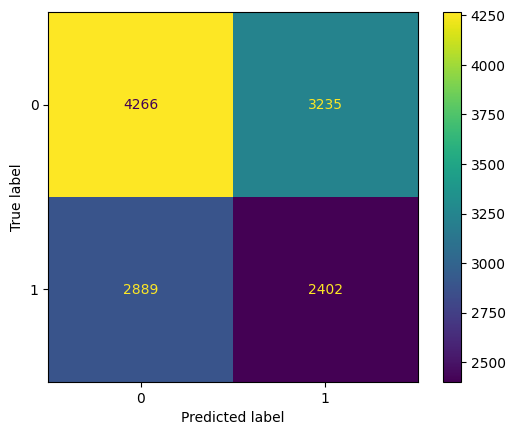

In [118]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, values_format='d')
plt.show()

In [119]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.5212632895559725
Acurácia (Teste): 0.5114915572232646
Acurácia Balanceada (Treino): 0.511351312044553
Acurácia Balanceada (Teste): 0.5026065950459504
Precision (Treino): 0.42611318076991306
Precision (Teste): 0.4167539267015707
Recall (Treino): 0.453978453978454
Recall (Teste): 0.4509915014164306
F1-Score (Treino): 0.4396046852122987
F1-Score (Teste): 0.4331972789115646
ROCAUC (Treino): 0.5191521367364589
ROCAUC (Teste): 0.5048864871727727


In [133]:
parameters = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'Cs': [1, 10, 20],
    'max_iter': [100, 200, 300]

}


gridsearch= GridSearchCV(lr, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [134]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegressionCV(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'Cs': [1, 10, 20], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [135]:
# prompt: quero os melhores parametros do gridsearch

print(f"Best parameters: {gridsearch.best_params_}")
print(f"Best score: {gridsearch.best_score_}")

Best parameters: {'Cs': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.5863821169882563


In [139]:
lr_tunned = LogisticRegression(class_weight='balanced',
   C= 1,
   max_iter= 100,
   penalty= 'l1',
   solver= 'liblinear'
)
lr_tunned.fit(X_train, y_train)
lr_tunned.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [142]:
X_test.assign(churn = y_test).assign(label = lr_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
10907,0.980392,0.551039,0.8,0.0,1.00,0.2,1.0,0.0,0.0,1.0,0.0,0,0
2300,0.607843,0.098424,0.6,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,1,0
9322,0.019608,0.453186,0.6,0.0,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0,0
3502,0.568627,0.734186,0.0,0.0,0.50,0.6,1.0,0.0,0.0,0.0,1.0,1,0
720,0.235294,0.388331,1.0,0.0,0.25,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,0.137255,0.367550,1.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0,0
908,0.176471,0.666705,0.8,0.0,0.50,0.8,0.0,1.0,0.0,0.0,1.0,1,1
10777,0.372549,0.723567,0.0,0.0,0.50,0.0,1.0,0.0,1.0,0.0,0.0,0,0
9864,0.137255,0.313199,0.0,0.0,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0,0


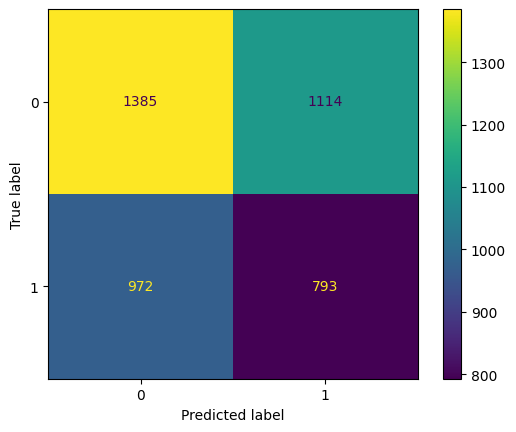

In [143]:
ConfusionMatrixDisplay.from_estimator(lr_tunned, X_test, y_test, values_format='d')
plt.show()

In [144]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.5228267667292058
Acurácia (Teste): 0.5107879924953096
Acurácia Balanceada (Treino): 0.5127123099393464
Acurácia Balanceada (Teste): 0.5017567366890099
Precision (Treino): 0.42765616657768285
Precision (Teste): 0.41583639223911906
Recall (Treino): 0.4541674541674542
Recall (Teste): 0.4492917847025496
F1-Score (Treino): 0.4405132905591201
F1-Score (Teste): 0.43191721132897604
ROCAUC (Treino): 0.5191968104246467
ROCAUC (Teste): 0.5045797355769504


##RANDOM FOREST

In [145]:
rf =  RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
rf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [147]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
10907,0.980392,0.551039,0.8,0.0,1.00,0.2,1.0,0.0,0.0,1.0,0.0,0,0
2300,0.607843,0.098424,0.6,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,1,1
9322,0.019608,0.453186,0.6,0.0,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0,0
3502,0.568627,0.734186,0.0,0.0,0.50,0.6,1.0,0.0,0.0,0.0,1.0,1,0
720,0.235294,0.388331,1.0,0.0,0.25,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,0.137255,0.367550,1.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0,1
908,0.176471,0.666705,0.8,0.0,0.50,0.8,0.0,1.0,0.0,0.0,1.0,1,0
10777,0.372549,0.723567,0.0,0.0,0.50,0.0,1.0,0.0,1.0,0.0,0.0,0,0
9864,0.137255,0.313199,0.0,0.0,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0,1


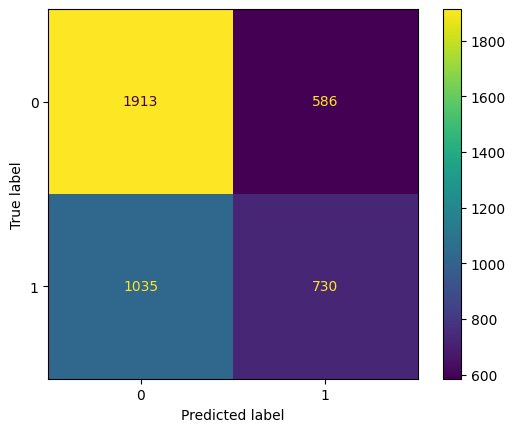

In [148]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, values_format='d')
plt.show()

In [149]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9956222639149468
Acurácia (Teste): 0.6198405253283302
Acurácia Balanceada (Treino): 0.9954597372275016
Acurácia Balanceada (Teste): 0.5895519680960203
Precision (Treino): 0.994895065229722
Precision (Teste): 0.5547112462006079
Recall (Treino): 0.9945189945189945
Recall (Teste): 0.41359773371104813
F1-Score (Treino): 0.9947069943289225
F1-Score (Teste): 0.4738721194417397
ROCAUC (Treino): 0.9998761331916911
ROCAUC (Teste): 0.6412724863316431


In [150]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [151]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
rf_tunned = RandomForestClassifier(
    bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 monotonic_cst= None,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False
)

rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [153]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

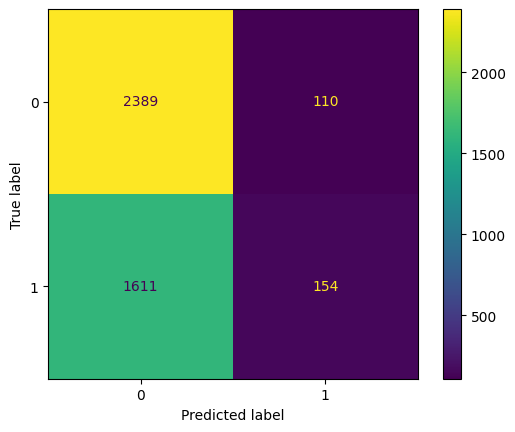

In [155]:
ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test, values_format='d')
plt.show()

In [156]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.6798780487804879
Acurácia (Teste): 0.5963883677298312
Acurácia Balanceada (Treino): 0.6133283784930232
Acurácia Balanceada (Teste): 0.5216172588015376
Precision (Treino): 0.9909688013136289
Precision (Teste): 0.5833333333333334
Recall (Treino): 0.22812322812322813
Recall (Teste): 0.08725212464589235
F1-Score (Treino): 0.37087110155169767
F1-Score (Teste): 0.15179891572203055
ROCAUC (Treino): 0.9009495640611492
ROCAUC (Teste): 0.571520959658651
